In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from patsy import dmatrices

In [6]:
df = pd.read_csv("Credit.csv")
df = df.drop(columns=['Unnamed: 0'])

# Add indicator variable if income > 50
df['Rich'] = 0
df.loc[df['Income'] > 50, 'Rich'] = 1

# 1. Decision Tree Classifier #

In [7]:
def myDTC(model_formula, df, max_depth):
    """
    Function returns the summary for decision tree classifier model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """

    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
            
    # Prepare the data
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Define a model
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    result = model.fit(X_train, y_train)

    validation_accuracy = accuracy_score(y_valid, model.predict(X_valid))

    # Retrun fitted model summary
    return validation_accuracy

def makeGraph(model_func, models, df, max_parameter):
    params = range(1,max_parameter)
    val_acc = []
    for model in models:
        validation_accuracy = [model_func(model, df, param) for param in params]
        val_acc.append(validation_accuracy)

    plt.figure(figsize=(12,5))
    for i,model in enumerate(models):
        plt.plot(params, val_acc[i], label=models[i])
    plt.xlabel('max_param')
    plt.legend()
    plt.show()

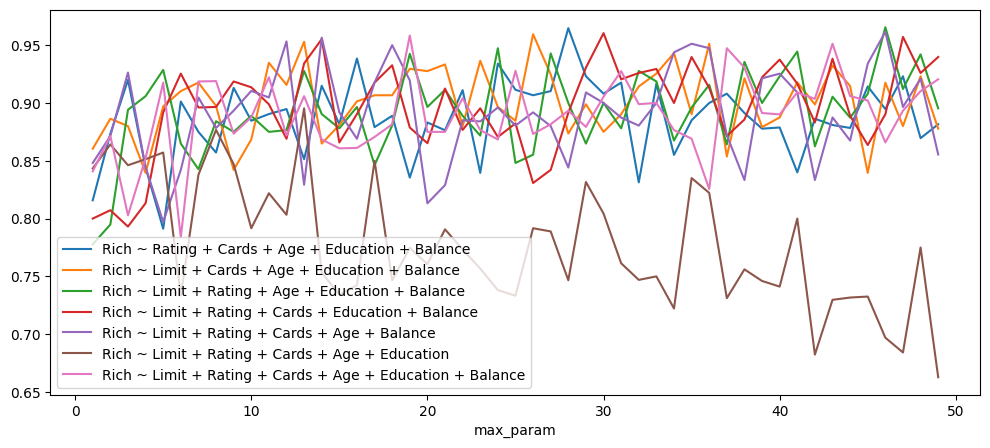

In [8]:
models = [
    'Rich ~ Rating + Cards + Age + Education + Balance',
    'Rich ~ Limit + Cards + Age + Education + Balance',
    'Rich ~ Limit + Rating + Age + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Education',
    'Rich ~ Limit + Rating + Cards + Age + Education + Balance',
]
makeGraph(myDTC, models, df, 50)

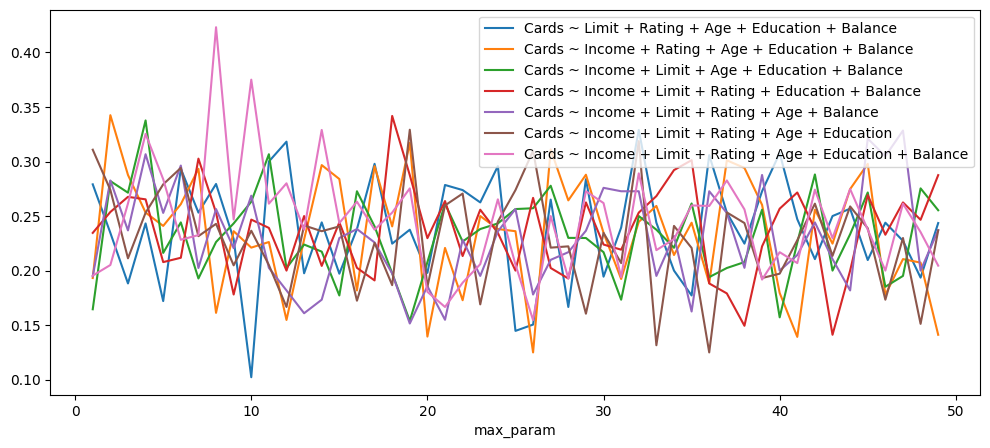

In [9]:
models = [
    'Cards ~ Limit + Rating + Age + Education + Balance',
    'Cards ~ Income + Rating + Age + Education + Balance',
    'Cards ~ Income + Limit + Age + Education + Balance',
    'Cards ~ Income + Limit + Rating + Education + Balance',
    'Cards ~ Income + Limit + Rating + Age + Balance',
    'Cards ~ Income + Limit + Rating + Age + Education',
    'Cards ~ Income + Limit + Rating + Age + Education + Balance',
]
makeGraph(myDTC, models, df, 50)

# 2. KNN #

In [10]:
def myKNN(model_formula, df, n_neighbors):
    """
    Function returns the summary for K nearest neighbors model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """

    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
            
    # Prepare the data
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')
    y_train = np.ravel(y_train)

    # Define a model
    model = KNeighborsClassifier(weights="uniform", n_neighbors=n_neighbors)
    result = model.fit(X_train, y_train)

    validation_accuracy = accuracy_score(y_valid, model.predict(X_valid))

    # Retrun fitted model summary
    return validation_accuracy

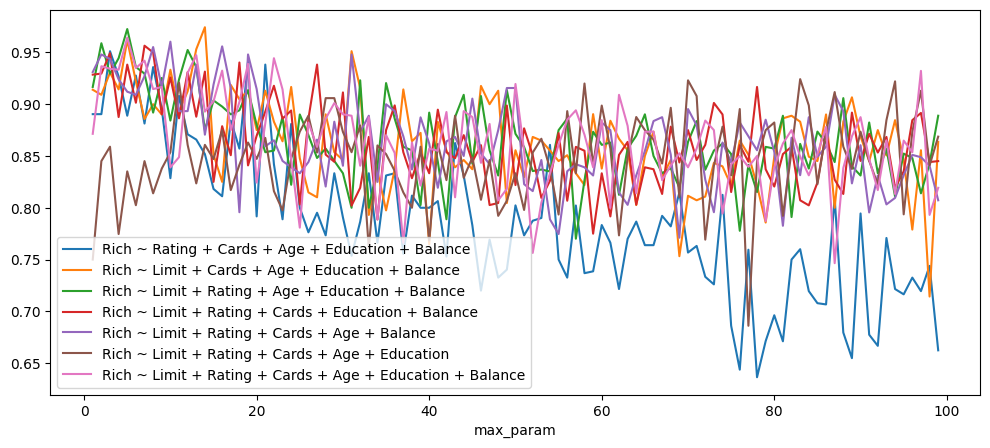

In [11]:
models = [
    'Rich ~ Rating + Cards + Age + Education + Balance',
    'Rich ~ Limit + Cards + Age + Education + Balance',
    'Rich ~ Limit + Rating + Age + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Education + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Balance',
    'Rich ~ Limit + Rating + Cards + Age + Education',
    'Rich ~ Limit + Rating + Cards + Age + Education + Balance',
]
makeGraph(myKNN, models, df, 100)

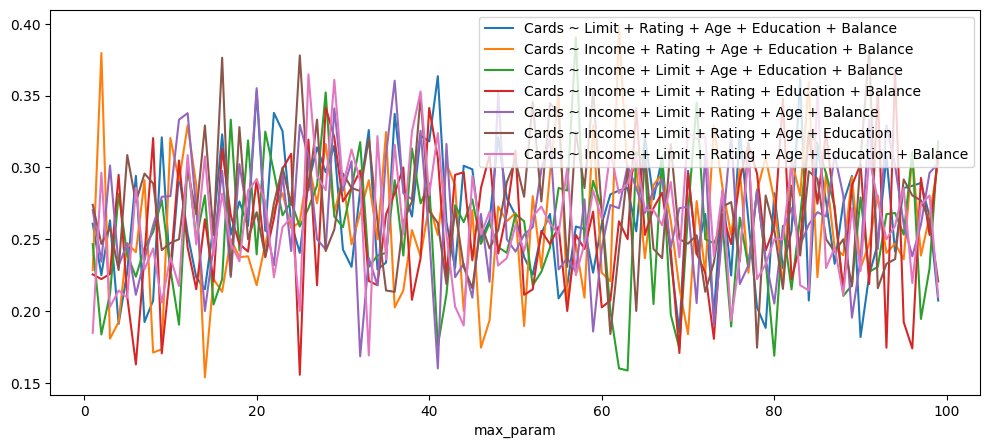

In [12]:
models = [
    'Cards ~ Limit + Rating + Age + Education + Balance',
    'Cards ~ Income + Rating + Age + Education + Balance',
    'Cards ~ Income + Limit + Age + Education + Balance',
    'Cards ~ Income + Limit + Rating + Education + Balance',
    'Cards ~ Income + Limit + Rating + Age + Balance',
    'Cards ~ Income + Limit + Rating + Age + Education',
    'Cards ~ Income + Limit + Rating + Age + Education + Balance',
]
makeGraph(myKNN, models, df, 100)

LRE :     mean: 0.947500       std: 0.028395
KNN1:     mean: 0.940000       std: 0.032016
KNN5:     mean: 0.935000       std: 0.027839
KNN10:     mean: 0.922500       std: 0.039449
DTC1:     mean: 0.910000       std: 0.035707
DTC2:     mean: 0.902500       std: 0.041003
DTC3:     mean: 0.912500       std: 0.037500
DTC4:     mean: 0.910000       std: 0.030000


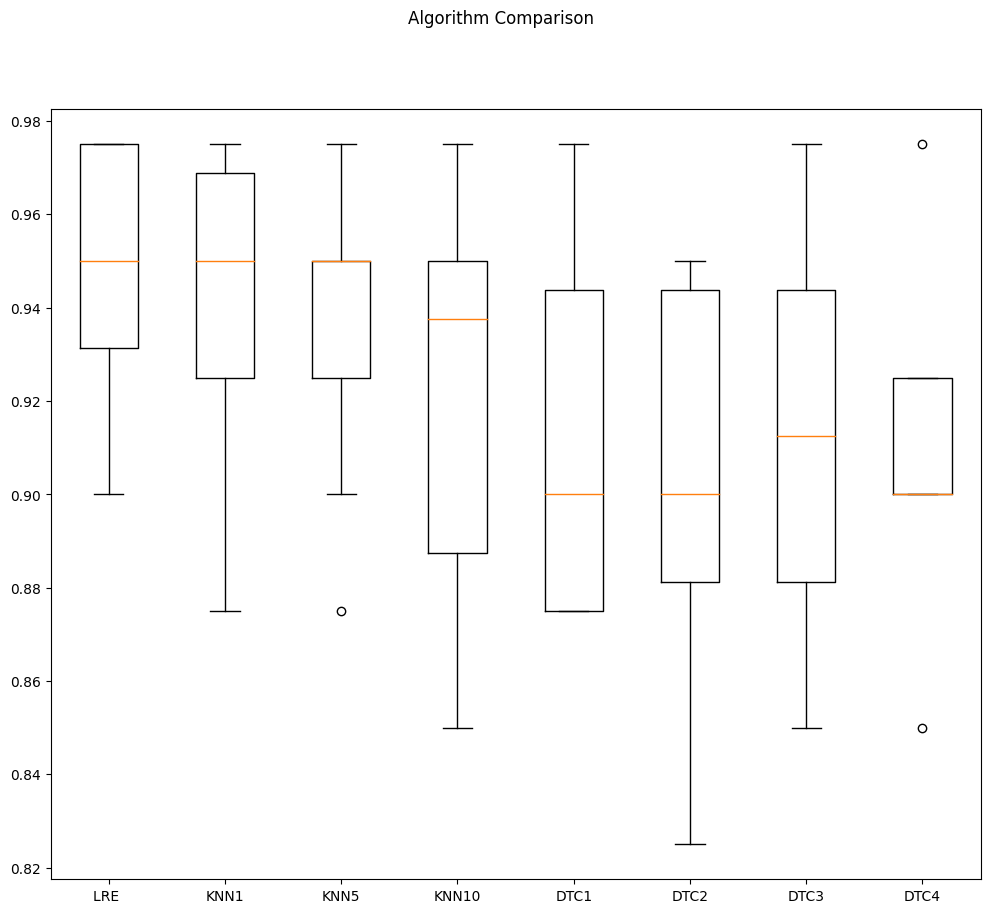

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

LRE :     mean: 0.320000       std: 0.056789
KNN1:     mean: 0.225000       std: 0.075829
KNN5:     mean: 0.240000       std: 0.065383
KNN10:     mean: 0.245000       std: 0.074833
DTC1:     mean: 0.230000       std: 0.050990
DTC2:     mean: 0.257500       std: 0.063295
DTC3:     mean: 0.260000       std: 0.059372
DTC4:     mean: 0.240000       std: 0.050249


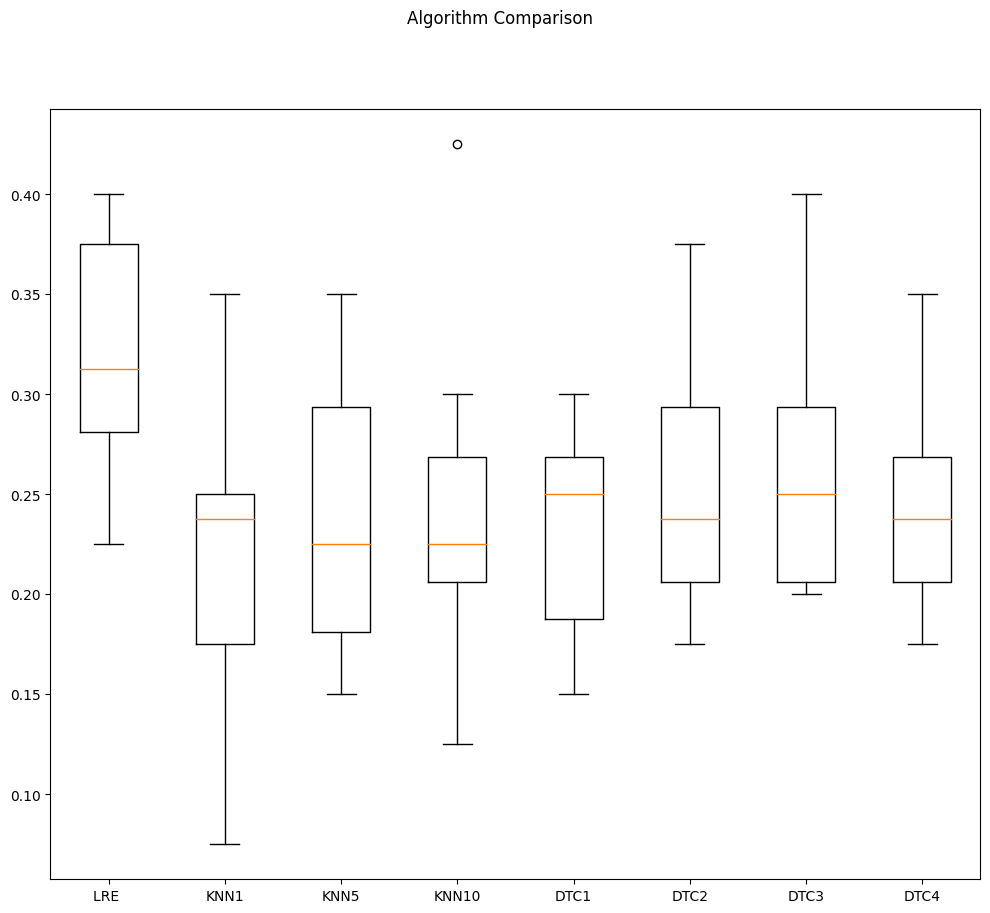

In [13]:
def kFold(model_formula):
    seed = 1
    # prepare models
    models = []
    models.append(('LRE ', LogisticRegression(max_iter=10000)))
    models.append(('KNN1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('KNN10', KNeighborsClassifier(n_neighbors=10)))
    models.append(('DTC1', DecisionTreeClassifier(criterion='gini')))
    models.append(('DTC2', DecisionTreeClassifier(criterion='entropy')))
    models.append(('DTC3', DecisionTreeClassifier(max_depth=5)))
    models.append(('DTC4', DecisionTreeClassifier(max_depth=10)))

    y, x = dmatrices(model_formula, data=df, return_type='dataframe') 
    Y = y.values.ravel()
    X = x.values

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s:     mean: %f       std: %f" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

kFold('Rich ~ Limit + Rating + Cards + Age + Education + Balance')
kFold('Cards ~ Income + Limit + Rating + Age + Education + Balance')

In [14]:
def gridSearchDTC(model_formula):
    y, x = dmatrices(model_formula, data=df, return_type='dataframe') 
    Y = y.values.ravel()
    X = x.values

    params_opt = {'max_depth':range(1, 30, 1), 'max_leaf_nodes':range(5,50,5)}

    gridSearchCV = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = params_opt, 
        cv=5)
    gridSearchCV.fit(X,Y)

    print('Best parameters: %s' % gridSearchCV.best_params_) 
    print('Best mean accuracy: %s' %gridSearchCV.best_score_)

gridSearchDTC('Rich ~ Limit + Rating + Cards + Age + Education + Balance')
gridSearchDTC('Cards ~ Income + Limit + Rating + Age + Education + Balance')

Best parameters: {'max_depth': 14, 'max_leaf_nodes': 20}
Best mean accuracy: 0.8975000000000002


c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 5, 'max_leaf_nodes': 15}
Best mean accuracy: 0.27


In [15]:
def gridSearchKNN(model_formula):
    y, x = dmatrices(model_formula, data=df, return_type='dataframe') 
    Y = y.values.ravel()
    X = x.values

    params_opt = {'n_neighbors':range(1, 30, 1), 'weights':['uniform', 'distance']}

    gridSearchCV = GridSearchCV(
        estimator = KNeighborsClassifier(), 
        param_grid = params_opt, 
        cv=5)
    gridSearchCV.fit(X,Y)

    print('Best parameters: %s' % gridSearchCV.best_params_) 
    print('Best mean accuracy: %s' %gridSearchCV.best_score_)

gridSearchKNN('Rich ~ Limit + Rating + Cards + Age + Education + Balance')
gridSearchKNN('Cards ~ Income + Limit + Rating + Age + Education + Balance')

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best mean accuracy: 0.9475


c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'n_neighbors': 25, 'weights': 'uniform'}
Best mean accuracy: 0.31
